## 로지스틱 회귀


In [1]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [2]:
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [3]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
print(fish_input[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [4]:
fish_target = fish['Species'].to_numpy()

In [5]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target)

In [6]:
#훈련 테스트 세트 표준화 전처리
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [7]:
#최근접 이웃 분류기의 확률 예측
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=3) #최근접 이웃 갯수 k=3
kn.fit(train_scaled, train_target)
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8739495798319328
0.75


타깃값을 그대로 사이킷런 모델에 전달하면 자동으로 순서가 알파벳 순서로 매겨지므로,  
predict 메서드를 사용하여 test set에 있는 처음 5개의 샘플 값을 출력해보도록 하겠습니다. 

In [8]:
print(kn.classes_) #그대로 전달한 타깃값 출력
print(kn.predict(test_scaled[:5])) #test set에 있는 처음 5개 샘플 타깃값

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
['Parkki' 'Perch' 'Roach' 'Perch' 'Perch']


predict 예측은 어떻게 만들어졌는지 predict_proba() 메서드를 이용하여 클래스별 확률값을 확인해보겠습니다.  

In [9]:
import numpy as np
proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=4))  #소숫점 넷째자리까지 표기(다섯번째에서 반올림)

[[0.     0.6667 0.3333 0.     0.     0.     0.    ]
 [0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.3333 0.     0.6667 0.     0.    ]
 [0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.3333 0.     0.3333 0.3333 0.    ]]


첫 번째 열이 'Bream' 에 대한 확률을, 두 번째 열이 'Parkki'에 대한 확률을 나타냅니다.  
계산한 비율이 맞는지 확인해보기 위해 첫 번째 샘플의 최근접 이웃을 출력해봅시다. 

In [10]:
distances, indexes = kn.kneighbors(test_scaled[0:1])
print(train_target[indexes])

[['Parkki' 'Parkki' 'Perch']]


첫 번째 샘플의 이웃은 Perch가 1개, Parkki가 2개이므로 'Parkki'에 해당하는 세 번째 클래스가 2/3, 'Perch'에 해당하는 다섯번째 클래스가 1/3 값을 갖게 됩니다.  
  
여기까지 k-최근접 이웃 분류기를 사용한 확률 예측을 해보았습니다.  
<br/>  
다음으로 로지스틱 회귀를 사용한 예측을 해보도록 하겠습니다.

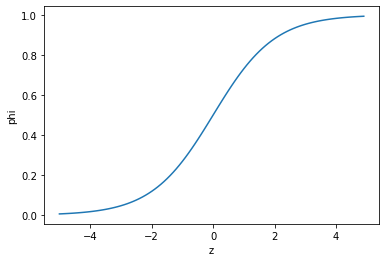

In [11]:
import matplotlib.pyplot as plt
z = np.arange(-5, 5, 0.1)
phi = 1 / (1 + np.exp(-z))
plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

In [12]:
#로지스틱 회귀로 이진분류 수행하기
char_arr = np.array(['A', 'B', 'C', 'D', 'E'])
print(char_arr[[True, False, True, False, False]])

['A' 'C']


In [13]:
#도미(Bream)와 빙어(Smelt)만 출력하기
bream_smelt_indexes = (train_target == 'Bream')|(train_target == 'Smelt')
print(bream_smelt_indexes)

[False  True False False False False  True False False  True False  True
  True False False False  True  True False  True False False  True False
 False False  True False False False False False False False  True False
  True  True False  True False False  True False False  True False  True
 False False  True  True False False False  True  True False False False
  True  True False False False False False False False  True False  True
 False False  True False False False False  True False False False False
  True False  True False False False False False False False  True  True
 False False False False  True  True False False False False False False
 False False False False  True  True  True False False  True False]


In [14]:
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

이제 이 데이터로 로지스틱 회귀 모델을 훈련합니다.  
그리고 훈련 모델을 사용하여 train_bream_smelt에 있는 첫 5개 샘플을 출력해보겠습니다.

In [15]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

print(lr.predict(train_bream_smelt[:5]))

['Smelt' 'Smelt' 'Smelt' 'Smelt' 'Bream']


두 번째와 다섯번째를 빙어, 나머지를 도미로 예측했습니다.  
이 5개의 예측 확률을 출력해보겠습니다. 

In [16]:
print(lr.predict_proba(train_bream_smelt[:5]))

[[0.03391154 0.96608846]
 [0.03603855 0.96396145]
 [0.03582089 0.96417911]
 [0.02900509 0.97099491]
 [0.99410165 0.00589835]]


어떤 게 도미고 어떤게 빙어의 확률인지 알아보기 위해서 classes_ 속성을 사용할 수 있습니다. 

In [17]:
print(lr.classes_)

['Bream' 'Smelt']


이제 로지스틱 회귀가 학습한 계수를 확인해보겠습니다. 

In [18]:
print(lr.coef_, lr.intercept_)

[[-0.42646881 -0.60256452 -0.68252074 -0.99456193 -0.78263044]] [-2.28791769]


이를 통해 로지스틱 회귀 모델이 학습한 방정식을 도출해낼 수 있습니다.  
<br/>
$$
z = - 0.426 * (Weight) - 0.603 * (Length) - 0.683 * (Diagnoal) - 0.995 * (Height) - 0.783 * (Width) - 2.288
$$

이 방정식을 이용하여 z값을 계산해보겠습니다.

In [19]:
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

[ 3.34950001  3.28646197  3.29274597  3.51084984 -5.12716733]


이 z값을 시그모이드 함수에 통과시키면 확률을 얻을 수 있습니다.  
그러나 scipy 라이브러리에 expit()를 사용하여 시그모이드 함수를 쓸 수 있습니다. 

In [20]:
from scipy.special import expit
print(expit(decisions))

[0.96608846 0.96396145 0.96417911 0.97099491 0.00589835]


이제 앞서 이진 분류를 진행했으니 다중분류를 수행해보도록 하겠습니다.  

In [21]:
lr = LogisticRegression(C = 20, max_iter = 1000)
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9411764705882353
0.85


In [22]:
#test set의 처음 5개 샘플에 대한 예측
print(lr.predict(test_scaled[:5]))

['Parkki' 'Perch' 'Roach' 'Perch' 'Perch']


In [23]:
#test set의 처음 5개에 대한 예측 확률
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3)) #소수점 세번째자리까지 표기

[[0.01  0.73  0.006 0.    0.223 0.    0.03 ]
 [0.01  0.    0.898 0.002 0.    0.    0.089]
 [0.001 0.018 0.28  0.002 0.661 0.    0.038]
 [0.002 0.    0.953 0.001 0.    0.    0.044]
 [0.    0.012 0.816 0.    0.119 0.051 0.002]]


In [24]:
#classes_속성으로 클래스 정보 확인
print(lr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [25]:
print(lr.coef_.shape, lr.intercept_.shape)

(7, 5) (7,)


이진 분류에서는 시그모이드 함수를 사용하여 z를 0과 1 사이의 값으로 변환했지만,  
다중 분류에서는 소프트맥스 함수를 사용하여 7개의 z값을 확률로 변환합니다.  
<br/>
먼저 7개의 z 값을 각각 z1, z2, ... , z7로 이름을 붙인 후 지수함수를 취해 모두 더한 다음, 각 지수함수의 값을 전체 더한 값으로 나눠주면 됩니다. 

In [26]:
#z1부터 z7까지의 값 구하고 확률로 바꾸기
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2)) #소수점 둘째자리까지 표기

[[ -0.17   4.13  -0.67  -3.44   2.95  -3.75   0.96]
 [  4.31  -5.68   8.79   2.78   0.69 -17.37   6.48]
 [ -2.69   0.28   3.04  -2.01   3.9   -3.56   1.05]
 [  3.78  -6.28   9.85   2.82   0.69 -17.63   6.78]
 [ -8.63   1.35   5.59  -4.1    3.66   2.82  -0.7 ]]


In [27]:
from scipy.special import softmax
proba = softmax(decision, axis = 1)
print(np.round(proba, decimals = 3)) #소수점 셋째자리까지 표시

[[0.01  0.73  0.006 0.    0.223 0.    0.03 ]
 [0.01  0.    0.898 0.002 0.    0.    0.089]
 [0.001 0.018 0.28  0.002 0.661 0.    0.038]
 [0.002 0.    0.953 0.001 0.    0.    0.044]
 [0.    0.012 0.816 0.    0.119 0.051 0.002]]
